<a href="https://colab.research.google.com/github/CristianRiquelmeF/Scoring-Crediticio-con-Redes-Neuronales/blob/main/M7Final_CristianRiquelme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nombre: Cristian Riquelme



> Sistema Inteligente de Scoring Crediticio con Redes Neuronales Profundas

Las entidades financieras deben decidir si otorgan o no un crédito a un cliente. Esta decisión, si se basa en modelos poco explicables, puede generar sesgos, exclusiones injustas o pérdida económica. Se busca construir un modelo moderno, basado en redes neuronales profundas, que sea a la vez preciso y explicable.



In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# **Carga del DataSet "German Credit Data" y EDA**

- Este conjunto de datos, en la forma proporcionada por el profesor Hofmann, contiene atributos categóricos/simbólicos, que pueden usarse para estudiar el riesgo de crédito, los factores que lo causan, etc.

In [ ]:
# Descargar última versión del dataset desde Kaggle
path = kagglehub.dataset_download("prena0808/statlog-german-credit-data")

print("Path to dataset files:", path)
# Listar archivos dentro de la carpeta descargada
print(os.listdir(path))

# Cargar archivo .xlsx
df = pd.read_excel(os.path.join(path, "German Credit Data.xlsx"))

print(df.shape)
df.head()

Path to dataset files: /kaggle/input/statlog-german-credit-data
['German Credit Data.xlsx']
(1000, 21)


,checking account status,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,employment,Installment,status n sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,existing credits no.,Job,liability responsibles,Telephone,foreign worker,Category
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
print("Cantidad de filas:")
display(df.shape[0])
print("")
print("Número de columnas:")
display(df.shape[1])

Cantidad de filas:


1000


Número de columnas:


21

In [ ]:
# Revisión del contenido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   checking account status      1000 non-null   object
 1   Duration in month            1000 non-null   int64 
 2   Credit history               1000 non-null   object
 3   Purpose                      1000 non-null   object
 4   Credit amount                1000 non-null   int64 
 5   Savings account/bonds        1000 non-null   object
 6   employment                   1000 non-null   object
 7    Installment                 1000 non-null   int64 
 8   status n sex                 1000 non-null   object
 9    Other debtors / guarantors  1000 non-null   object
 10  residence                    1000 non-null   int64 
 11  Property                     1000 non-null   object
 12  Age in years                 1000 non-null   int64 
 13  Other installment plans      1000 

In [ ]:
# Observación de valores nulos
df.isnull().sum()

,0
checking account status,0
Duration in month,0
Credit history,0
Purpose,0
Credit amount,0
Savings account/bonds,0
employment,0
Installment,0
status n sex,0
Other debtors / guarantors,0


In [ ]:
# Revisión valores duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
print("Estadísticos descriptivos")
df.describe()

Estadísticos descriptivos


,Duration in month,Credit amount,Installment,residence,Age in years,existing credits no.,liability responsibles,Category
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
# Conteo de clases en variable objetivo
df['Category'].value_counts()

,count
Category,
1,700
2,300


/tmp/ipython-input-428133293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=df, palette="Set2")


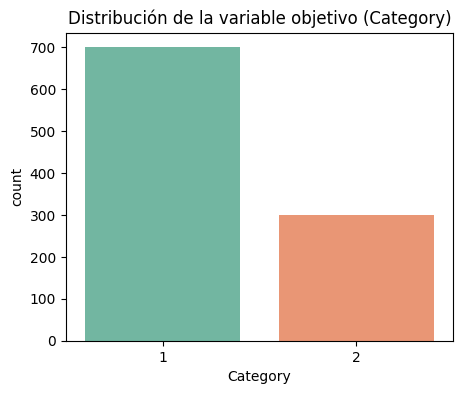

In [ ]:
# Distribución de la variable objetivo

plt.figure(figsize=(5,4))
sns.countplot(x="Category", data=df, palette="Set2")
plt.title("Distribución de la variable objetivo (Category)")
plt.show()

**Se observa desbalance en variable objetivo**

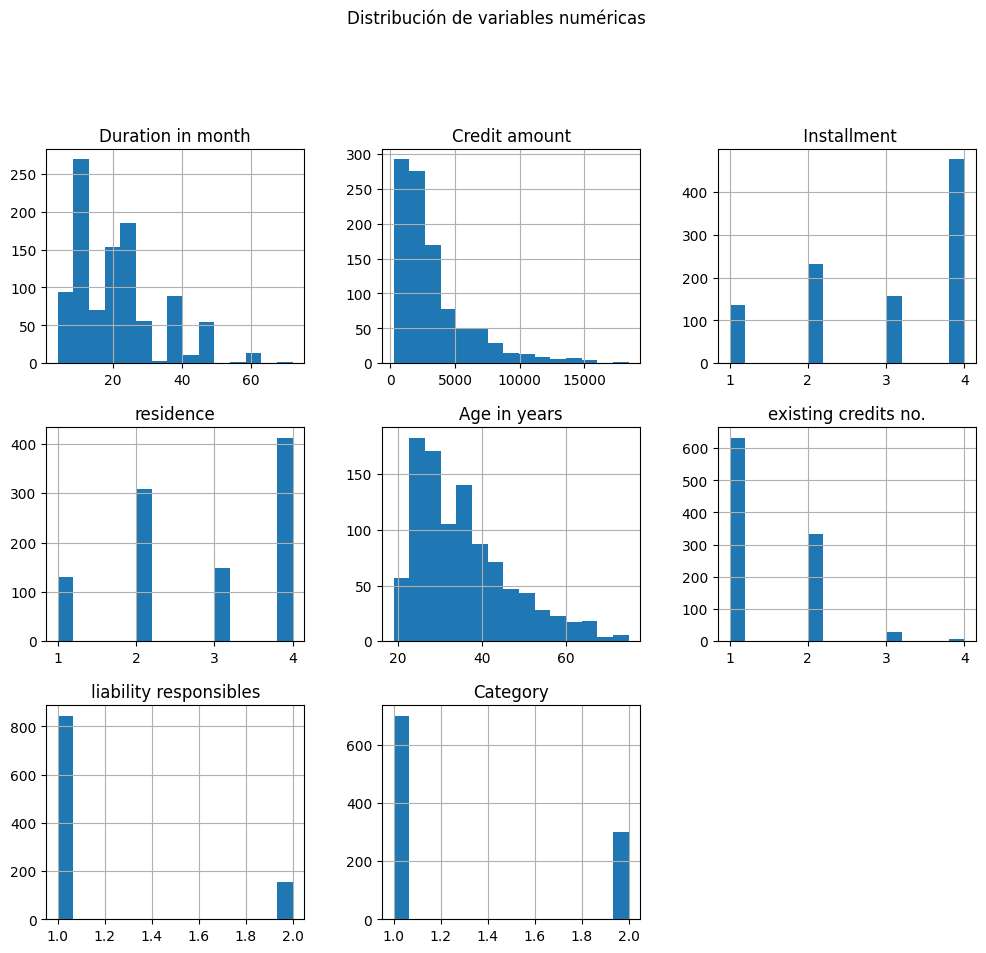

In [ ]:
# Histogramas de variables numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols].hist(figsize=(12, 10), bins=15)
plt.suptitle("Distribución de variables numéricas", y=1.02)
plt.show()

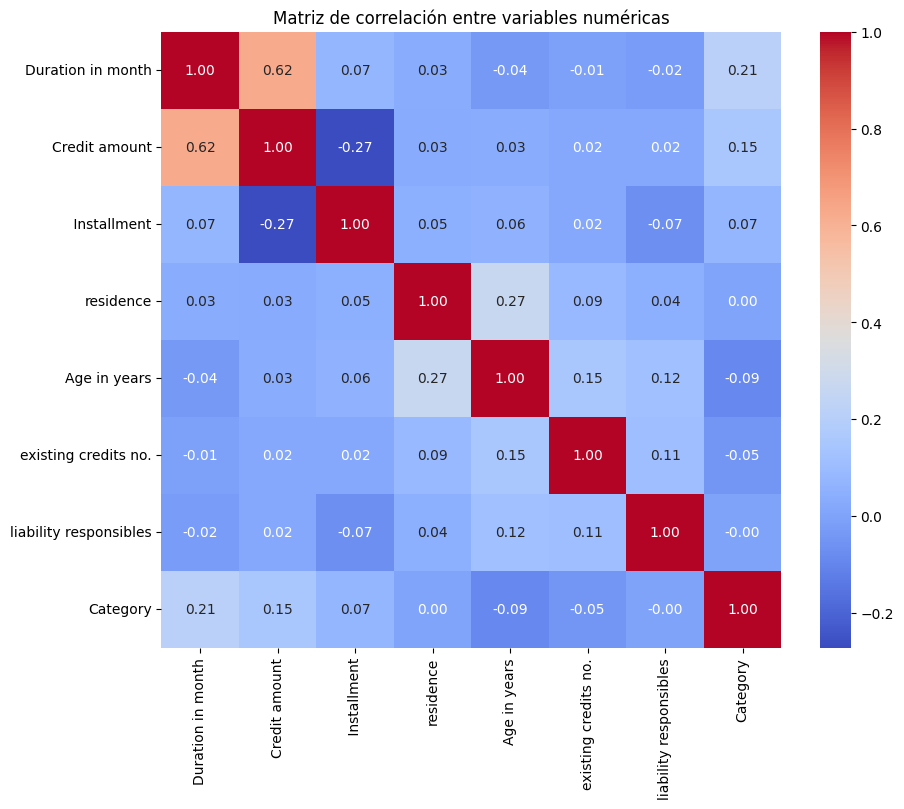

In [ ]:
# Correlación
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


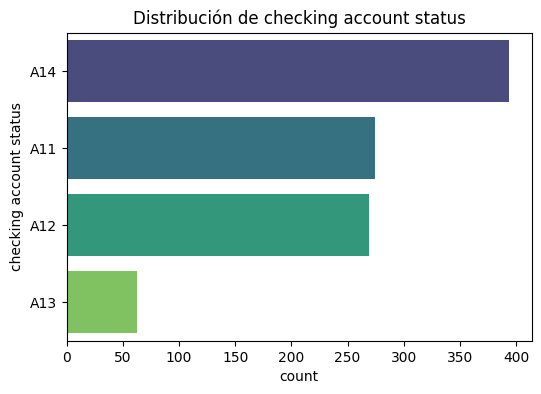

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


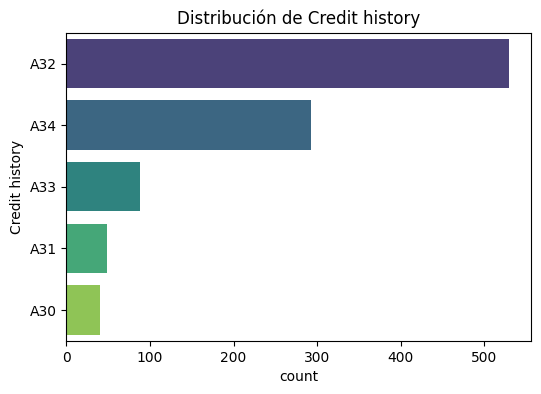

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


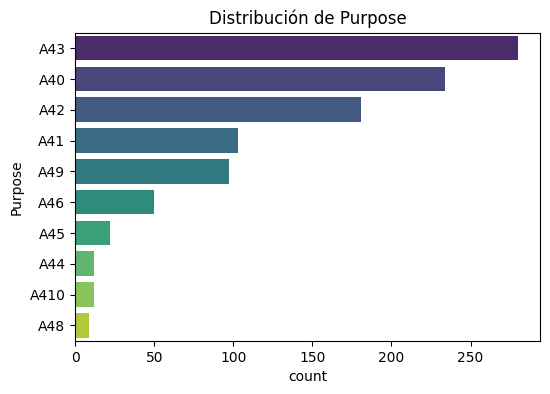

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


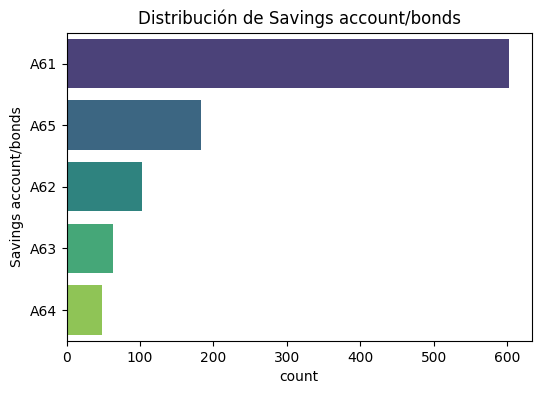

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


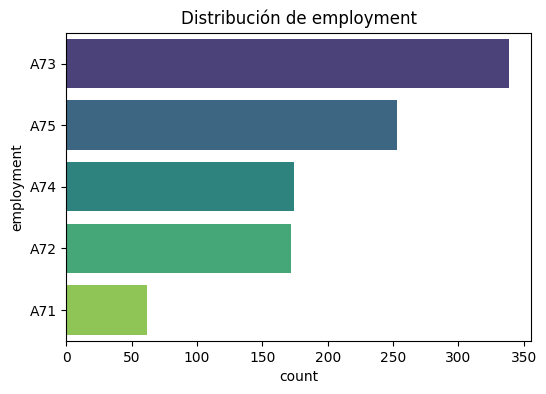

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


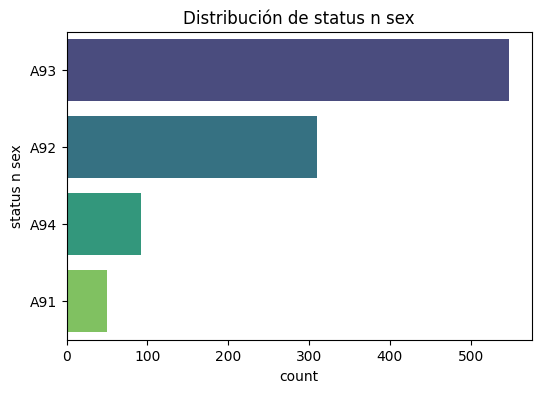

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


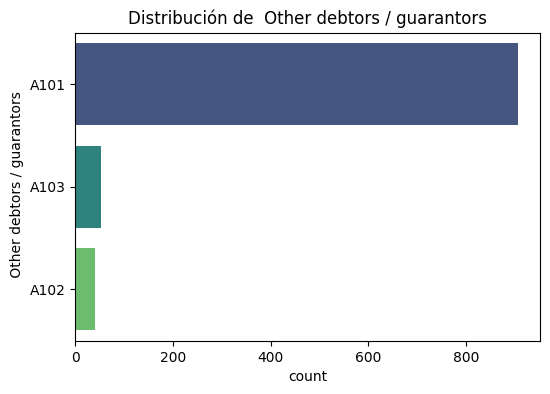

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


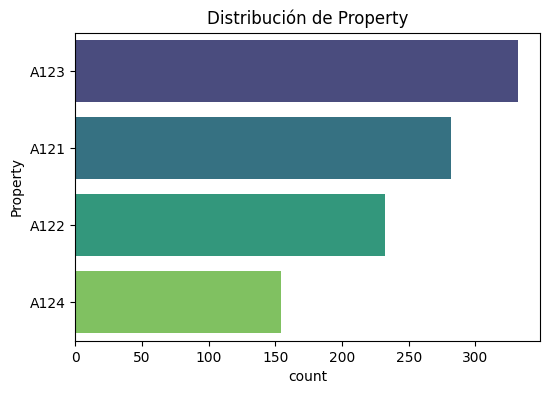

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


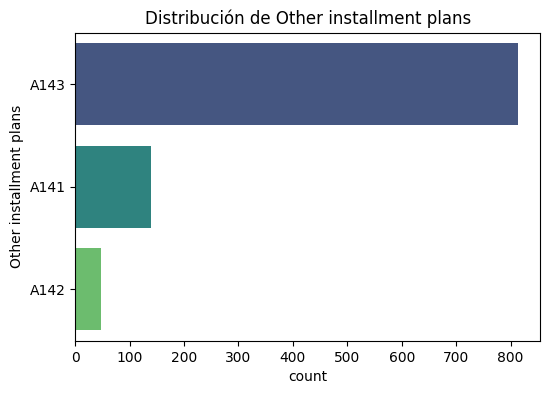

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


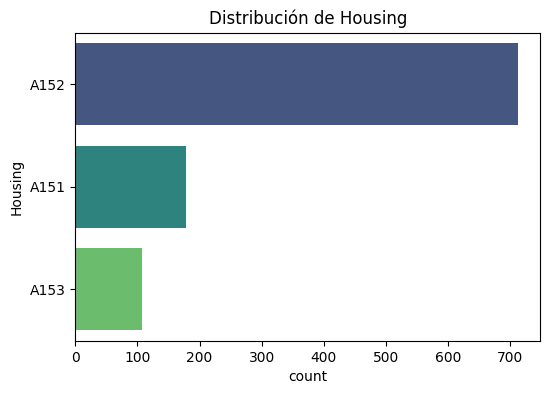

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


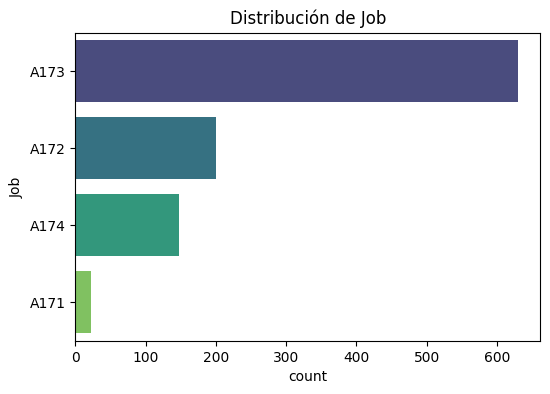

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


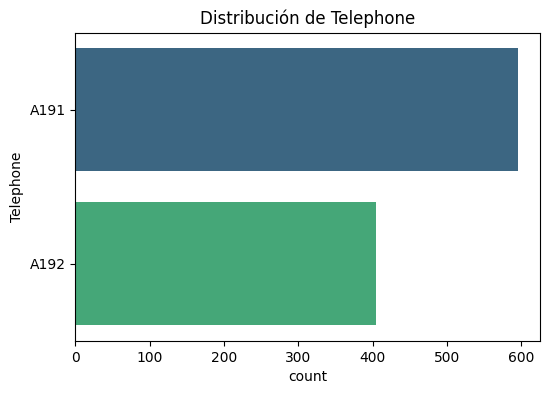

/tmp/ipython-input-152388417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")


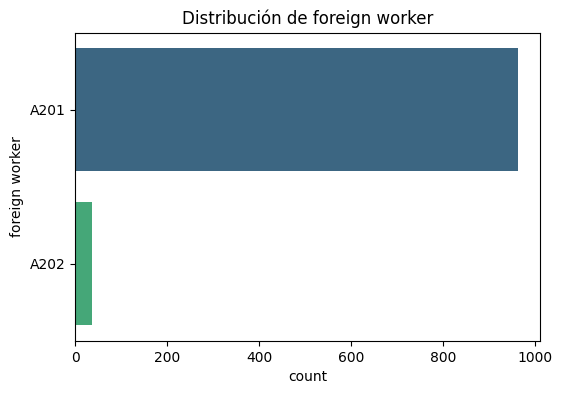

In [ ]:
# Gráficas variables categóricas
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribución de {col}")
    plt.show()

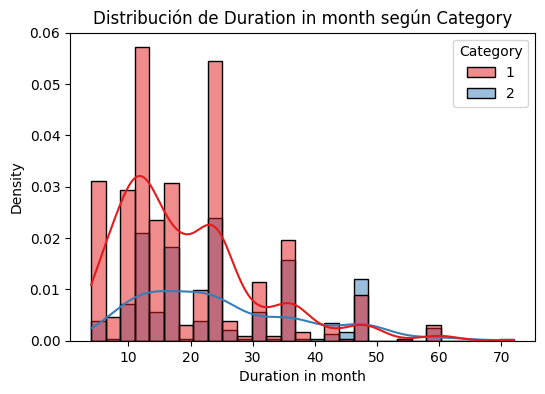

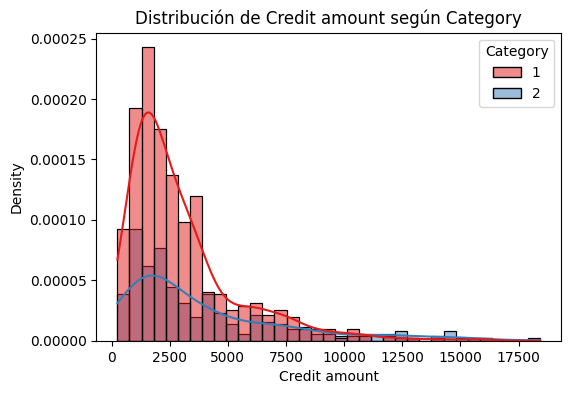

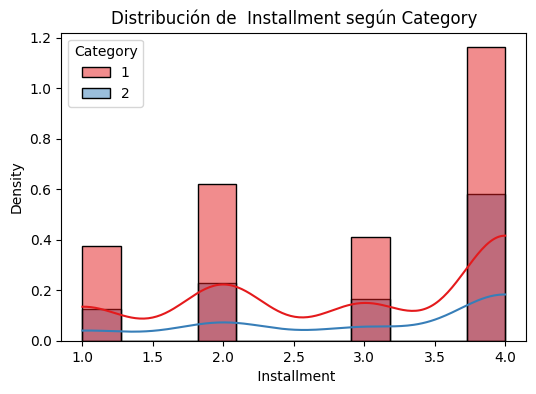

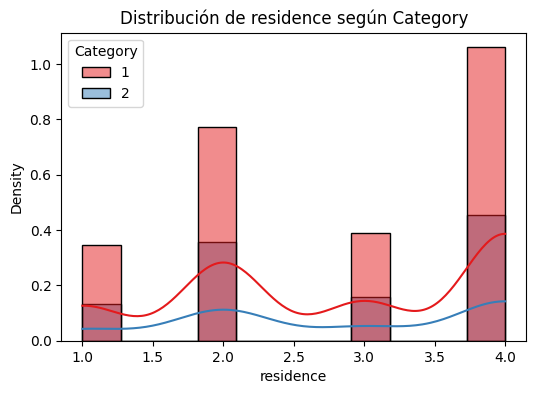

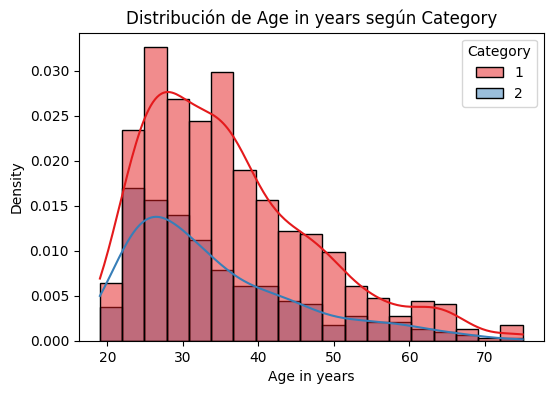

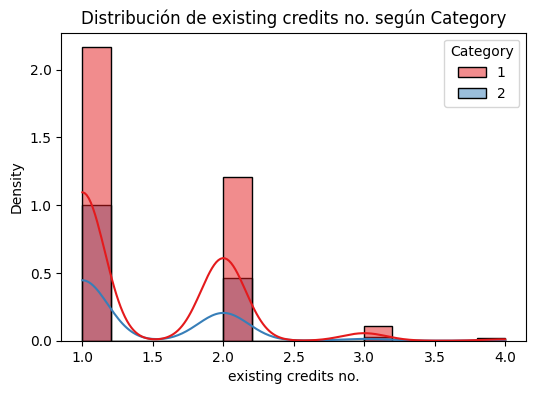

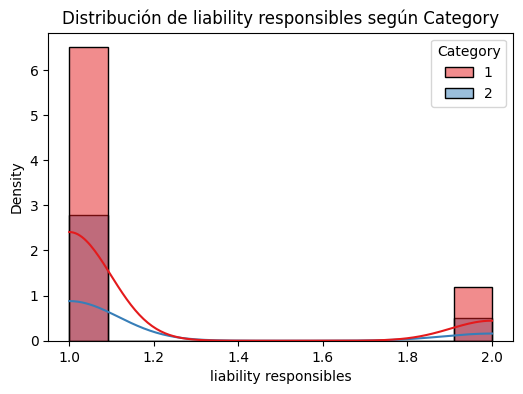

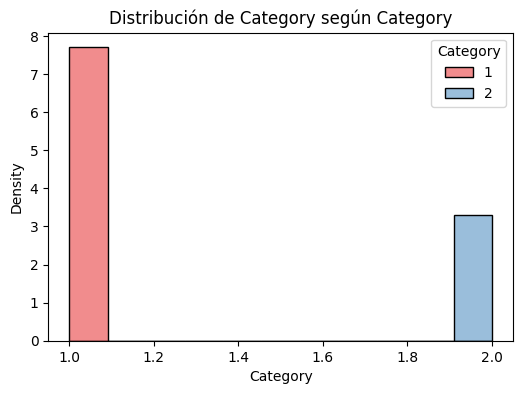

In [ ]:
# Relación de numéricas con 'Category'
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Category", kde=True, stat="density", palette="Set1")
    plt.title(f"Distribución de {col} según Category")
    plt.show()

# Preprocesamiento

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
# Separar las características (X) del objetivo (y)
X = df.drop('Category', axis=1)
y = df['Category']

In [ ]:
# Es una buena práctica convertir la variable objetivo a 0 y 1.
# El dataset original usa 1 para 'Bueno' y 2 para 'Malo'. Lo mapearemos a 0 y 1.
# 0 = Bueno (clase mayoritaria), 1 = Malo (clase minoritaria)
y = y.map({1: 0, 2: 1})

In [ ]:
# Identificar columnas numéricas y categóricas automáticamente
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba ANTES de cualquier preprocesamiento
# Esto es CRÍTICO para evitar la fuga de datos. SMOTE solo se aplicará al conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Crear el transformador para las variables numéricas (escalado)
numeric_transformer = StandardScaler()

# Crear el transformador para las variables categóricas
# handle_unknown='ignore' evita errores si en el futuro aparecen categorías no vistas en el entrenamiento
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Unir los transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (si las hubiera)
)

In [ ]:
# Ajustamos y transformamos el conjunto de entrenamiento
X_train_processed = preprocessor.fit_transform(X_train)

In [ ]:
# Solo transformamos el conjunto de prueba (usando el ajuste del conjunto de entrenamiento)
X_test_processed = preprocessor.transform(X_test)

**Manejo de desbalanceo con técnica SMOTE**

In [ ]:
# Verificamos el desbalanceo en el conjunto de entrenamiento antes de SMOTE
print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

Distribución de clases antes de SMOTE:
Category
0    560
1    240
Name: count, dtype: int64


In [ ]:
# Inicializar SMOTE. random_state es para reproducibilidad
smote = SMOTE(random_state=42)

# Aplicar SMOTE **SOLO** al conjunto de entrenamiento procesado
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Verificar el desbalanceo después de aplicar SMOTE
print("\nDistribución de clases después de SMOTE:")
print(pd.Series(y_train_smote).value_counts())

print("\nForma de los datos de entrenamiento antes de SMOTE:", X_train_processed.shape)
print("Forma de los datos de entrenamiento después de SMOTE:", X_train_smote.shape)


Distribución de clases después de SMOTE:
Category
1    560
0    560
Name: count, dtype: int64

Forma de los datos de entrenamiento antes de SMOTE: (800, 61)
Forma de los datos de entrenamiento después de SMOTE: (1120, 61)


**SMOTE:**

- SMOTE funciona creando "muestras sintéticas" de la clase minoritaria para igualar en número a la clase mayoritaria.

- Es fundamental aplicar SMOTE después de dividir los datos y solo en el conjunto de entrenamiento. Si se aplica antes, se estarían creando muestras sintéticas que podrían terminar tanto en el conjunto de entrenamiento como en el de prueba, un caso de fuga de datos que haría que la evaluación del modelo fuera irrealmente optimista.

- Se puede ver en la salida, después de SMOTE, y_train_smote tiene el mismo número de muestras para cada clase, y el número de filas en X_train_smote ha aumentado.

# Construcción del modelo

- Comparar una red DNN simple con una red moderna como ResNet para tabulares (con skip connections).

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PREPARACIÓN DE DATOS

In [ ]:
# Keras puede tener problemas con matrices dispersas de SciPy.
# Nos aseguramos de que sean arrays densos de NumPy.
if "sparse" in str(type(X_train_smote)):
    X_train_smote = X_train_smote.toarray()
if "sparse" in str(type(X_test_processed)):
    X_test_processed = X_test_processed.toarray()

In [ ]:
# Definir la forma de entrada para los modelos
input_shape = (X_train_smote.shape[1],)

**Definición de Callbacks**

In [ ]:
# Estos callbacks se usarán para ambos modelos para asegurar una comparación justa.

# EarlyStopping: detiene el entrenamiento si no hay mejora para evitar el sobreajuste.
early_stopping = EarlyStopping(
    monitor='val_loss', # Métrica a monitorear
    patience=15,        # Número de épocas sin mejora antes de detenerse
    restore_best_weights=True, # Restaura los pesos del mejor modelo encontrado
    verbose=1
)

# ReduceLROnPlateau: reduce la tasa de aprendizaje cuando la métrica se estanca.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Factor por el cual se reducirá la tasa de aprendizaje (new_lr = lr * factor)
    patience=5,
    min_lr=0.00001, # Límite inferior para la tasa de aprendizaje
    verbose=1
)

callbacks_list = [early_stopping, reduce_lr]

In [ ]:
# CONSTRUCCIÓN DEL MODELO: DNN SIMPLE CON DROPOUT Y L2.

def build_simple_dnn(input_shape):
    model = tf.keras.Sequential([
        Input(shape=input_shape),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='sigmoid') # Capa de salida para clasificación binaria
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

print("--- Construyendo DNN Simple ---")
dnn_model = build_simple_dnn(input_shape)
dnn_model.summary()

--- Construyendo DNN Simple ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,201 (75.00 KB)

 Trainable params: 18,753 (73.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# CONSTRUCCIÓN DEL MODELO: RESNET PARA TABULARES  CON DROPOUT Y L2.

# Bloque residual: la pieza clave de una ResNet
def resnet_block(x, units, dropout_rate, l2_reg):
    # Camino principal
    fx = Dense(units, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    fx = BatchNormalization()(fx)
    fx = Dropout(dropout_rate)(fx)
    fx = Dense(units, activation='relu', kernel_regularizer=l2(l2_reg))(fx)

    # Skip connection (conexión residual)
    # Si las dimensiones no coinciden, se ajustan con una capa Dense de 1x1
    if x.shape[-1] != units:
        x = Dense(units)(x)

    # Se suma la entrada original (x) a la salida del bloque (fx)
    output = Add()([x, fx])
    output = BatchNormalization()(output)
    return output

def build_tabular_resnet(input_shape):
    inputs = Input(shape=input_shape)

    # Capa inicial para procesar la entrada
    x = Dense(64, activation='relu')(inputs)

    # Apilamos bloques residuales
    x = resnet_block(x, units=64, dropout_rate=0.3, l2_reg=0.001)
    x = resnet_block(x, units=64, dropout_rate=0.3, l2_reg=0.001)

    # Transición a un número menor de unidades
    x = resnet_block(x, units=32, dropout_rate=0.2, l2_reg=0.001)

    # Capa de salida
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

print("\n--- Construyendo ResNet para Datos Tabulares ---")
resnet_model = build_tabular_resnet(input_shape)
resnet_model.summary()


--- Construyendo ResNet para Datos Tabulares ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 61)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      3,968 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      4,160 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_5[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      4,160 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64)        │          0 │ dense_4[0][0],    │
│                     │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ add[0][0]         │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      4,160 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_7[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      4,160 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64)        │          0 │ batch_normalizat… │
│                     │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ add_1[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │      2,080 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_9[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 32)        │      2,080 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      1,056 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 32)        │          0 │ dense_11[0][0],   │
│                     │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 27,137 (106.00 KB)

 Trainable params: 26,497 (103.50 KB)

 Non-trainable params: 640 (2.50 KB)

**ENTRENAMIENTO Y EVALUACIÓN**

In [ ]:
# Parámetros de entrenamiento
EPOCHS = 20
BATCH_SIZE = 32

In [ ]:
# Entrenamiento del modelo DNN
print("\n--- Entrenando DNN Simple ---")
dnn_smote = dnn_model.fit(
    X_train_smote,
    y_train_smote,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_processed, y_test), # Usamos el test set original para validación
    callbacks=callbacks_list,
    verbose=1)


--- Entrenando DNN Simple ---
Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8034 - loss: 0.5849 - val_accuracy: 0.7450 - val_loss: 0.7255 - learning_rate: 1.0000e-05
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8082 - loss: 0.5983 - val_accuracy: 0.7500 - val_loss: 0.7251 - learning_rate: 1.0000e-05
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8340 - loss: 0.5557 - val_accuracy: 0.7500 - val_loss: 0.7244 - learning_rate: 1.0000e-05
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7992 - loss: 0.6200 - val_accuracy: 0.7450 - val_loss: 0.7247 - learning_rate: 1.0000e-05
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8060 - loss: 0.5975 - val_accuracy: 0.7500 - val_loss: 0.7249 - learning_rate: 1.0000e-05
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7840 - loss: 0.6017 - val_accuracy: 0.7500 - val_loss: 0.7241 - learning_rate: 1.0000e-05
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

In [ ]:
# Entrenamiento del modelo ResNet
print("\n--- Entrenando ResNet ---")
resnet_smote = resnet_model.fit(
    X_train_smote,
    y_train_smote,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_processed, y_test),
    callbacks=callbacks_list,
    verbose=1
)


--- Entrenando ResNet ---
Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7636 - loss: 0.8099 - val_accuracy: 0.6850 - val_loss: 0.9446 - learning_rate: 1.0000e-05
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7385 - loss: 0.8344 - val_accuracy: 0.6900 - val_loss: 0.9412 - learning_rate: 1.0000e-05
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7641 - loss: 0.8181 - val_accuracy: 0.6900 - val_loss: 0.9411 - learning_rate: 1.0000e-05
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7760 - loss: 0.7984 - val_accuracy: 0.6900 - val_loss: 0.9385 - learning_rate: 1.0000e-05
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7370 - loss: 0.8369 - val_accuracy: 0.6900 - val_loss: 0.9374 - learning_rate: 1.0000e-05
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7877 - loss: 0.8092 - val_accuracy: 0.6950 - val_loss: 0.9372 - learning_rate: 1.0000e-05
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

**Explicabilidad**
- Visualizar cómo influye cada variable en las predicciones.
- LIME es rápido y excelente para obtener una justificación local e intuitiva de por qué se tomó una decisión para un cliente específico.


In [ ]:
pip install lime

In [ ]:
import lime
import lime.lime_tabular

# LIME para clasificación binaria con Keras necesita una función de predicción específica.
# Esta función debe devolver las probabilidades para AMBAS clases (Bueno y Malo)
# en un formato de (n_muestras, 2).
def predict_fn_for_lime(x):
    # El modelo DNN devuelve la probabilidad de la clase 1 ('Malo')
    # USAR EL MODELO (dnn_model) EN LUGAR DEL OBJETO HISTORY (dnn_smote)
    prob_malo = dnn_model.predict(x)
    # La probabilidad de la clase 0 ('Bueno') es 1 - prob_malo
    prob_bueno = 1 - prob_malo
    # Unimos ambas probabilidades en una sola matriz
    return np.hstack((prob_bueno, prob_malo))

# CREAR EL EXPLICADOR DE LIME

# Creamos el objeto explainer. Le damos los datos de entrenamiento para que
# pueda aprender las distribuciones de cada variable y generar perturbaciones realistas.
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed, # Array de numpy con los datos de entrenamiento
    mode='classification',
    feature_names=feature_names, # La lista con los nombres de todas las variables
    class_names=['Crédito Bueno', 'Crédito Malo'],
    verbose=True
)

print("\nExplicador de LIME creado exitosamente.")


# EXPLICAR UNA PREDICCIÓN INDIVIDUAL

# Seleccionamos un cliente del conjunto de prueba para explicar.
# Usemos el mismo que en el ejemplo de SHAP para comparar (ej. posición 10)
cliente_idx = 10
cliente_a_explicar = X_test_processed_df.iloc[cliente_idx].values

print(f"\nGenerando explicación para el cliente en la posición {cliente_idx}...")

# Usamos el explainer para generar la explicación para este cliente.
# Le pedimos que nos muestre las 10 características más influyentes.
explanation = explainer.explain_instance(
    data_row=cliente_a_explicar,
    predict_fn=predict_fn_for_lime,
    num_features=10
)

# VISUALIZAR LA EXPLICACIÓN

# LIME tiene una excelente visualización integrada para notebooks como Jupyter o Colab.
explanation.show_in_notebook(show_table=True)

# Opcional: Si quieres usar los resultados en tu propio código, puedes obtenerlos como una lista.
print("\nExplicación como lista (variable, peso):")
print(explanation.as_list())


Explicador de LIME creado exitosamente.

Generando explicación para el cliente en la posición 10...
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Intercept 0.20647885625602963
Prediction_local [0.44301188]
Right: 0.0692617



Explicación como lista (variable, peso):
[('Purpose_A41 <= 0.00', 0.18499047842463961), ('0.00 < checking account status_A14 <= 1.00', -0.183429199468277), ('Duration in month > 0.27', 0.18335204889228668), ('Purpose_A46 <= 0.00', -0.1467019035546372), ('checking account status_A11 <= 0.00', -0.14466290150918726), ('Credit history_A34 <= 0.00', 0.1361835798394994), ('employment_A74 <= 0.00', 0.1272239720308866), ('Savings account/bonds_A61 <= 0.00', -0.12688970799475943), ('Savings account/bonds_A64 <= 0.00', 0.10848628879917607), ('Savings account/bonds_A65 <= 0.00', 0.09798037279627834)]


Una explicación para un cliente con un 93% de clasificación como 'Crédito bueno' sería : "El modelo recomienda aprobar a este cliente con alta seguridad (93%). El análisis de LIME confirma que es un perfil de muy bajo riesgo. Su historial de crédito es bueno, la duración y el propósito del préstamo son considerados seguros, y no presenta ninguna de las señales de alerta que el modelo suele identificar en clientes riesgosos. Es una decisión clara y bien fundamentada."

In [ ]:
# Obtener predicciones de probabilidad (para la curva ROC)
y_pred_proba_dnn = dnn_model.predict(X_test_processed).ravel()
y_pred_proba_resnet = resnet_model.predict(X_test_processed).ravel()

# Obtener predicciones de clase (para reporte y matriz de confusión)
# Se usa un umbral de 0.5 por defecto
y_pred_class_dnn = (y_pred_proba_dnn > 0.5).astype("int32")
y_pred_class_resnet = (y_pred_proba_resnet > 0.5).astype("int32")

print("Predicciones generadas.\n")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predicciones generadas.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Reporte de clasificación
target_names = ['Crédito Bueno (Clase 0)', 'Crédito Malo (Clase 1)']

print("\n--- Modelo: DNN Simple ---")
print(classification_report(y_test, y_pred_class_dnn, target_names=target_names))

print("\n--- Modelo: ResNet ---")
print(classification_report(y_test, y_pred_class_resnet, target_names=target_names))



--- Modelo: DNN Simple ---
                         precision    recall  f1-score   support

Crédito Bueno (Clase 0)       0.89      0.75      0.81       140
 Crédito Malo (Clase 1)       0.57      0.78      0.66        60

               accuracy                           0.76       200
              macro avg       0.73      0.77      0.74       200
           weighted avg       0.79      0.76      0.77       200


--- Modelo: ResNet ---
                         precision    recall  f1-score   support

Crédito Bueno (Clase 0)       0.84      0.69      0.76       140
 Crédito Malo (Clase 1)       0.49      0.70      0.58        60

               accuracy                           0.69       200
              macro avg       0.67      0.70      0.67       200
           weighted avg       0.74      0.69      0.71       200



**Análisis del reporte:**

La "condición positiva" es detectar a un cliente malo, ya que ese es el riesgo que queremos identificar.

**Modelo: DNN Simple**

 - Recall (Clase 1) = 0.78 (78%):

Esto significa que el modelo identifica correctamente al 78% de todos los clientes malos.

Por lo tanto, el 22% (1 - 0.78) de los clientes malos no son detectados y son clasificados erróneamente como "buenos". Estos son los Errores Tipo II (Falsos Negativos).

 - Precision (Clase 1) = 0.57 (57%):

Cuando el modelo levanta una alarma y dice "este cliente es malo", acierta el 57% de las veces.

El 43% (1 - 0.57) restante de esas alarmas son en realidad clientes buenos. Estos son los Errores Tipo I (Falsos Positivos).
  
**Modelo: ResNet**

 - Recall (Clase 1) = 0.70 (70%):

Este modelo identifica correctamente al 70% de los clientes malos.

Esto implica que un 30% (1 - 0.70) de los clientes malos son aprobados por error. Una tasa de Errores Tipo II del 30%.

- Precision (Clase 1) = 0.49 (49%):

Cuando el modelo predice "Crédito Malo", acierta solo el 49% de las veces.

El 51% (1 - 0.49) de las veces que marca a un cliente como riesgoso, en realidad es un buen cliente. Una tasa de Errores Tipo I del 51%.

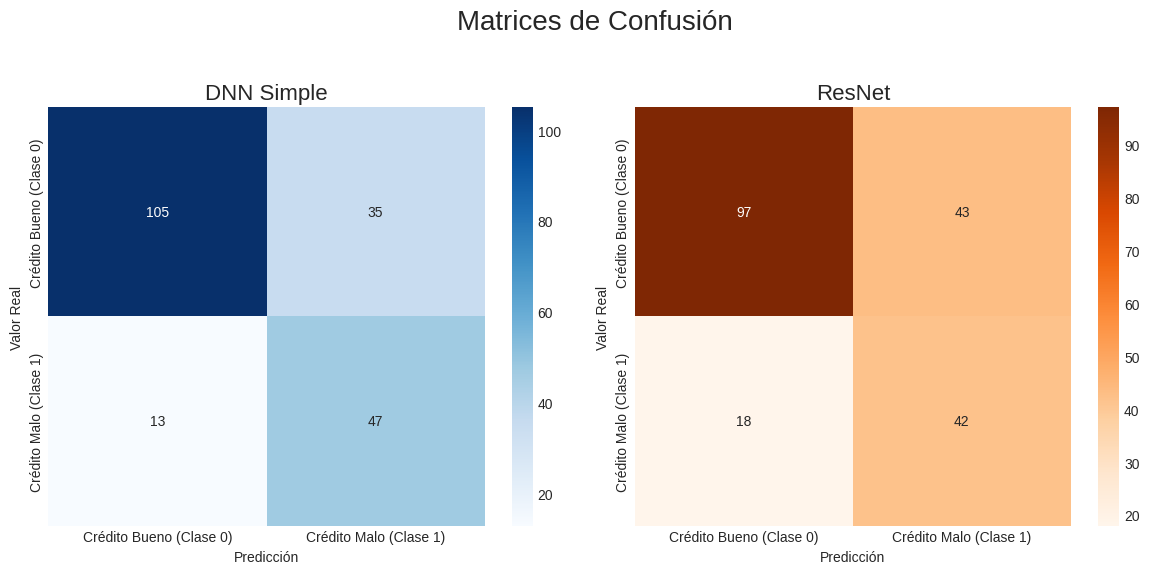

In [ ]:
# Gráfica de matriz de confusión
# Crear una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Matrices de Confusión', fontsize=20)

# Matriz para DNN Simple
cm_dnn = confusion_matrix(y_test, y_pred_class_dnn)
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=target_names, yticklabels=target_names)
axes[0].set_title('DNN Simple', fontsize=16)
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Matriz para ResNet
cm_resnet = confusion_matrix(y_test, y_pred_class_resnet)
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=target_names, yticklabels=target_names)
axes[1].set_title('ResNet', fontsize=16)
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor Real')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el supertítulo
plt.show()

**Análisis de las matrices**

**Modelo DNN Simple:**

- Errores Tipo II (Pérdida Directa): 13

Aprobó erróneamente a 13 clientes malos que generarán pérdidas.

 - Errores Tipo I (Costo de Oportunidad): 35

Rechazó a 35 clientes buenos, perdiendo oportunidades de negocio.

**Modelo ResNet:**
 - Errores Tipo II (Pérdida Directa): 18

Aprobó a 18 clientes malos, casi un 40% más de errores críticos que el modelo DNN.

 - Errores Tipo I (Costo de Oportunidad): 43

Rechazó a 43 clientes buenos, siendo también menos eficiente.


Generando Curva ROC...


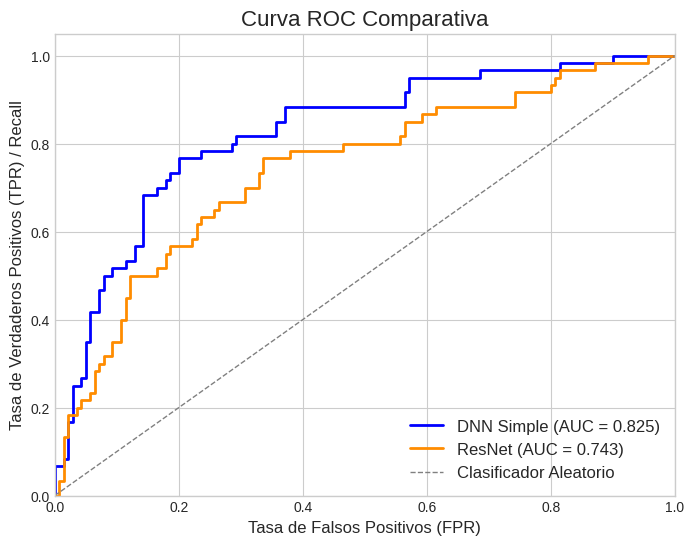

In [ ]:
# GRÁFICA DE CURVA ROC Y CÁLCULO DE AUC ---

print("\nGenerando Curva ROC...")

# Calcular FPR, TPR y AUC para ambos modelos
fpr_dnn, tpr_dnn, _ = roc_curve(y_test, y_pred_proba_dnn)
auc_dnn = auc(fpr_dnn, tpr_dnn)

fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_pred_proba_resnet)
auc_resnet = auc(fpr_resnet, tpr_resnet)

# Graficar ambas curvas
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='blue', lw=2, label=f'DNN Simple (AUC = {auc_dnn:.3f})')
plt.plot(fpr_resnet, tpr_resnet, color='darkorange', lw=2, label=f'ResNet (AUC = {auc_resnet:.3f})')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--', label='Clasificador Aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Recall', fontsize=12)
plt.title('Curva ROC Comparativa', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

**Análisis Cuantitativo (Puntuación AUC)**

El AUC (Area Under the Curve) es una métrica que resume el rendimiento general del modelo en una sola cifra (donde 1.0 es perfecto y 0.5 es aleatorio).

**DNN Simple** tiene un AUC de **0.825.**

**ResNet** tiene un AUC de **0.743.**

**Impacto práctico:** La puntuación de 0.825 del DNN es significativamente más alta. Esto indica que tiene una **capacidad de discriminación mucho mejor**. En términos simples, si se elige al azar un cliente bueno y uno malo, el modelo DNN tiene un 82.5% de probabilidad de asignar una puntuación de riesgo más alta al cliente malo, mientras que el ResNet solo tiene un 74.3% de probabilidad.

Como **consideración final**, hay que tener en cuenta que, luego de construido los **dos modelos de redes neuronales** (DNN y ResNet), su **principal desventaja** es que permanecen como **modelos de "caja negra"** (black box). ¿Qué significa esto? Podemos ver la entrada (los datos del cliente) y la salida (la decisión "Bueno" o "Malo"), pero es extremadamente difícil entender el razonamiento interno. **No podemos señalar una razón simple y lineal de por qué se tomó una decisión.** No podemos decir "se te negó el crédito porque tu edad sumó 5 puntos de riesgo y tu tipo de trabajo sumó 10". El modelo aprende interacciones complejas y no lineales entre cientos de variables (después del one-hot encoding)y para explicar hay que usar métodos como SHAP o LIME como en este caso se hizo con un cliente en paticular. Un equipo de riesgo no puede simplemente "confiar" en un modelo que no entiende. Necesitan auditar su lógica, entender sus límites y saber cuándo sus decisiones podrían no ser fiables.

¿Puede Explicarse este Modelo a un Equipo de Riesgo Bancario?
Aunque un modelo DNN no se puede desglosar como una simple regresión logística, sí podemos explicarlo de una manera más potente y útil para el negocio. La conversación cambia de auditar la fórmula matemática interna a analizar el razonamiento detrás de cada decisión. Con herramientas como LIME y SHAP, pasamos de una explicación teórica a una evidencia práctica. El equipo de riesgo ya no pregunta '¿cuál es el coeficiente de esta variable?', sino que obtiene respuestas claras como: 'Este cliente fue aprobado principalmente por su excelente historial de crédito, a pesar de que el monto solicitado era alto', permitiendo una justificación clara y accionable para cada caso."